# Modelación espacio-temporal de la Caldera de Acoculco (caso estacionario)
## José Eduardo Lara Rodríguez.
## Geofísica Matemática Computacional
## Fecha 22 de octubre 2021

# -----------------------------------------------------------------------------------------------------------

# Modelo conceptual

**Objetivos**

El artículo Thermal history of the Acoculco geothermal system, eastern Mexico: Insights from numerical modeling and radiocarbon dating (Carles Canet et. al.), tiene como objetivos:
Comprender la evolución térmica de Acoculco para poder evaluar su potencial geotérmico. 
Reconstruir la historia térmica del sistema de Acoculco a partir de los cambios geotérmicos que evolucionan durante periodos relativamente cortos de tiempo.

Determinar cuándo ocurrió la transición del régimen de transferencia de calor, de convectivo a conductivo. 
Con el propósito de determinar cuándo ocurrió la transición del régimen de transferencia de calor, se desarrolló un modelo 1D que simula la distribución tiempo-profundidad de temperatura. 

Además se realizaron estudios de cronología utilizando método de radiocarbono para indicar la secuencia de los distintos acontecimientos termales tal como la actividad explosiva hidrotermal y el régimen de transferencia de calor por convección y fechar los eventos explosivos.

**Ubicación y características geológicas**

Acoculco es un área prospectiva geotérmica que está alojado en una caldera volcánica, complejo que se extiende sobre el límite del estado de Puebla-Hidalgo, en la porción oriental del Cinturón Volcánico Transmexicano. 
Este complejo tiene ∼18 km de diámetro y contiene hasta ∼900 m de rocas volcánicas calcalcalinas del Plioceno al Pleistoceno que recubren un basamento sedimentario del Mesozoico ( López-Hernández et al., 2009 ). El basamento está constituido de la base a la parte superior por areniscas jurásicas con intercalaciones de pelitas, biopelitas y calizas y dolomitas ricas en hidrocarburos; superpuesto por calcarenitas cretáceas y rocas arrecifales con pelitas menores y limolitas ( Viniegra-Osorio, 1965; Morales y Garduño, 1984 ). Una intrusión granítica de edad del Cretácico Tardío metamorfoseó la sección sedimentaria debajo del complejo de caldera Campos-Enríquez et al., 2003 ).            

Las rocas volcánicas del Plioceno al Pleistoceno son productos de la caldera, como resultado de dos períodos principales de actividad volcánica ( López-Hernández et al., 2009). El primer episodio (3.0-2.6 Ma) formó hasta ∼600 m de lavas dacíticas a riodacíticas y depósitos piroclásticos. El episodio posterior se produjo entre 1,7 y 1,26 Ma produciendo cúpulas de riolita, depósitos de ignimbrita y flujos de lava de dacita, con un espesor total de ∼300 m. Una erupción fuera de la estructura de la caldera (1.0-0.24 Ma) produjo flujos de basalto cubriendo parcialmente la caldera. 
                                          
Es una zona con manifestaciones superficiales escasas que consisten en descargas de gas ( ricas en CO 2 ) y manantiales de ácido sulfúrico de baja temperatura, mientras que la actividad explosiva hidrotermal se manifiesta profusamente por cráteres y montículos de escombros hidrotermales y brechas. 
La alteración silícica se extiende por varios kilómetros cuadrados alrededor del zona, con manifestaciones gaseosas y características explosivas, afectando rocas volcánicas superficiales, principalmente tobas y brechas. En el subsuelo, una zona de alteración argílica (illita de amonio) se extiende hasta una profundidad de ∼600 m, y debajo se encuentra una zona propilítica (epidota-calcita-clorita) hasta ∼1000 m.

**Características de los pozos**

El interés geotérmico de Acoculco, llevó a la Comisión Federal de Electricidad a perforar dos pozos: EAC-1 en 1995 y EAC-2 en 2008, alcanzando profundidades de 1810 y 1900 m bgs, respectivamente ( cf . Viggiano-Guerra et al., 2011 ).
Los dos pozos se perforaron muy cerca uno del otro, ubicándose ambos en la zona más austral con emisión activa de gases, conocida como Los Azufres. 

Las características de muestras tomadas a distintas profundidades se muestran a continuación



In [9]:
datos = pd.read_csv('Datos de pozo.csv')
print('\nDatos del problema \n{}'.format(datos))



Datos del problema 
   Muestra  Profundidad [m]  \
0        1                0   
1        2              100   
2        3              325   
3        4              602   
4        5              825   
5        6             1520   
6        7             1815   

         Tipo de roca / Descripción de la alteración  \
0        Brecha con alteración silícica generalizada   
1  Ignimbrita con alteración argílica generalizad...   
2  Toba de lapilli soldad, ligeramente alterada (...   
3              Lava dacita, con alteración argílica.   
4        Toba ceniza gruesa con alteración propílica   
5                                 Mármol, inalterado   
6                      Granito, ligeramente alterado   

                              Minerales  Densidad [kg/m3]  \
0                      Op, Q, Ana (Ill)              2124   
1                  Q, Ill-NH4 (Kao, Py)              2341   
2  Pl, Hb, Aug, Bio (Chl, Sme, Op, Cal)              2295   
3                   Q, Pl, FK, Ill (P

Para evaluar la evolución de la actividad geotérmica en Acoculco, el tiempo y la distribución espacial vertical en 1D ha sido numéricamente calculado utilizando el método de diferencias finitas. Esto se hizo desde la superficie hasta 1800 m bgs, correspondiente al intervalo de profundidad sobre el cual los datos experimentales de los pozos están disponibles. Se utilizaron dos conjuntos de datos experimentales para modelar la variación con el tiempo de las geotermas de los perfiles profundidad-temperatura. 
El modelo extrapola las dos curvas experimentales hasta 4000 m bgs, profundidad sugerida para la fuente de calor magmático. De esta forma, la extrapolación permite la integración de todas las condiciones de contorno suponiendo una transferencia de calor por conducción pura. 


# Modelo matemático (caso estacionario).


Se tiene la **Ecuación general de Calor:**
$$
C_p \rho \frac{\partial T}{\partial t} + C_p \rho \frac{\partial T}{\partial x_i}(u_jT) - \frac{\partial }{\partial x_j}(\kappa\frac{\partial T}{\partial x_j})=S  
$$
Donde el primer término
$$
C_p \rho \frac{\partial T}{\partial t} 
$$
representa la parte temporal, T cambia con el tiempo.

Segundo término 
$$
C_p \rho \frac{\partial T}{\partial x_i}(u_jT)
$$
Tiene que ver con la convección, hay movimiento donde u es la velocidad del movimiento.

Tercer término
$$
\frac{\partial }{\partial x_j}(\kappa\frac{\partial T}{\partial x_j})
$$
Proviene de la Ley de Transferencia de calor de Fourier (término de conducción).

**Parámetros Físicos**

Cp: Capacidad calorífica [J/Kg °K]

$\rho = $ densidad [kg/m^3]

$\kappa = $ conductividad térmica

S: Fuente o sumidero [J/m^3s]

alpha = k/cp(rho) : Difusividad térmica [m^2/s]

**Variables independientes** (Podemos darles el valor que queramos)

$x_j = $ Coordenadas cartesianas (x,y,z). [m]

$t = $ Tiempo [s]

**Variables dependientes.**

$T = $ temperatura [°K]

$u_j = $ Componentes de la velocidad (u_x, u_y, u_z). [m/s]

De acuerdo al modelo conceptual y tomando en cuenta que se va a estudiar y modelar el caso estacionario, nuestro interés se centra en la transferencia de calor en forma de conducción, no existe convección y el término temporal no se toma en cuenta, por lo tanto:

$$
-\frac{\partial }{\partial x_j}(\kappa\frac{\partial T}{\partial x_j})=S
$$

o

$$ 
D_{th} \frac{\partial{T^2}}{\partial{z^2}} = S
$$

$ D_{th}$ es la difusividad térmica y se define como:

$ D_{th}= \frac{\kappa}{\rho Cp}$

T es la temperatura en función del tiempo (t) y la profundidad (z).

El modelo utilizó $\kappa$ como parámetro numérico,mientras que Cp y ρ son valores experimentales

De acuerdo con el modelo conceptual no hay fuentes ni sumideros
$$
S = 0
$$

**Finalmente el Modelo Matemático específico para este problema en una dimensión y con K constante queda:**

$$ 
D_{th} \frac{\partial{T^2}}{\partial{z^2}} = 0
$$

Definiendo las condiciones de frontera
$$
T(z=0) = T_A    
$$
$$
T(z=L) = T_B
$$

Para este estudio se usó una profundidad z = 400 m. Donde los parámetros físicos varían en intervalos de distintas profundidades como se muestra a continuación:

In [31]:
data = pd.read_csv('phys_dat.csv') # Lectura de datos: k, cp, rho
print('\nParámetros físicos variables con la profundidad\n \n{}'.format(data))


Parámetros físicos variables con la profundidad
 
   depth1  depth2     k     cp     rho
0       0      50  1.84  840.0  2120.0
1      50     250  1.41  840.0  2340.0
2     250     400  1.36  840.0  2300.0
3     400     600  1.44  840.0  2300.0
4     600     800  1.46  840.0  2290.0
5     800    1000  1.68  840.0  2700.0
6    1000    1500  1.84  890.0  2700.0
7    1500    1900  1.66  890.0  2360.0
8    1900    4000  2.10  950.0  2760.0


**Condiciones de frontera**

El modelo asume un límite de temperatura fijo con condiciones de 15 ° C en la superficie y de 750 ° C a una profundidad de 4000 m bgs; el primer valor corresponde a la temperatura media anualde la región (Peláez Pavón, 2015), mientras que este último es la presunta temperatura de la fuente de calor considerada como magma silícico ( p . ej .Scaillet y col., 1998 ). Un supuesto adicional del modelo es que no hay ninguna fuente de calor (o disipador) además de la de naturaleza magmática que se supone que está a profundidades superiores a 4000 m bgs.
Estas temperaturas fijas en los extremos son las condiciones de frontera:

$$ 
D_{th} \frac{\partial{T^2}}{\partial{z^2}} = 0
$$

Definiendo las condiciones de frontera
$$
T(z=0) = 15°    
$$
$$
T(z=4000) = 750°
$$

# Modelo computacional (caso estacionario).


Datos del problema 
   depth1  depth2     k     cp     rho
0       0      50  1.84  840.0  2120.0
1      50     250  1.41  840.0  2340.0
2     250     400  1.36  840.0  2300.0
3     400     600  1.44  840.0  2300.0
4     600     800  1.46  840.0  2290.0
5     800    1000  1.68  840.0  2700.0
6    1000    1500  1.84  890.0  2700.0
7    1500    1900  1.66  890.0  2360.0
8    1900    4000  2.10  950.0  2760.0

 Dth : 
0    1.033243e-06
1    7.173382e-07
2    7.039337e-07
3    7.453416e-07
4    7.589936e-07
5    7.407407e-07
6    7.657095e-07
7    7.903257e-07
8    8.009153e-07
dtype: float64

Datos para la solución numérica usando FD
 dx =       50.0 [m] 
 L  =     4000.0 [m] 
 N  =       79

z shape = (81,) 
[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150.
 1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750.
 1800. 1850. 1900. 1950. 2000. 2050. 2100. 2150. 2200. 2250. 230

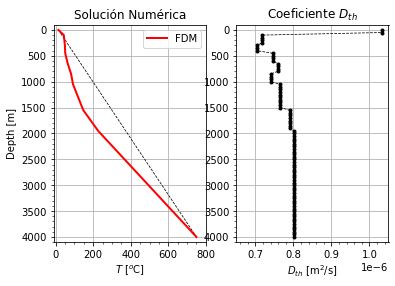

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fdm_1D import harmonicMean, arithmeticMean, Laplaciano1D, calcDth


#
# Datos físicos del problema
#
Ttop = 15   # Temperatura en la superficie
Tbot = 750  # Temperatura a 4000 m
L = 4000.0  # Profundidad máxima
data = pd.read_csv('phys_dat.csv') # Lectura de datos: k, cp, rho
Dth_data = data['k'] / (data['rho']*data['cp']) # Cálculo del coeficiente Dth

print('\nDatos del problema \n{}'.format(data))
print('\n Dth : \n{}'.format(Dth_data))
#input('Presiona <enter>')
#
# Datos para la solución numérica por diferencias finitas
#
N = 79                      # Número de incógnitas
dx = L / (N+1)              # Distancia entre nodos
z = np.linspace(0, L, N+2)  # Coordenada z de la profundidad
"""
La simulación obtiene resultados correctos (de acuerdo con el artículo) 
dentro de un rango de nodos que va de 79 a 99 aproximadamente.

Conforme se disminuye el número de nodos la curva de la solución se asemeja
a una recta. En camio si aumentamos considerablemente el número de nodos, la
curva de la solución comienza a tomar valores negativos de temperatura lo cual
es incorrecto.

"""
print('\nDatos para la solución numérica usando FD')
print(' dx = {:10.1f} [m] \n L  = {:10.1f} [m] \n N  = {:8d}'.format(dx, L, N))
print('\nz shape = {} \n{}'.format(z.shape,z))
#input('Presiona <enter>')
#
# Vector con el valor del coeficiente dependiendo de la profundidad 
#
Dth = calcDth(Dth_data, z, N)  # calcDth función que cálcula los valores de Dth para cada intervalo de profundidad donde
                               # los parámetros físicos varían. 
print(Dth)       
print('\nCoeficiente en los puntos de la simulación: \n D_th shape = {} \n{}'.format(Dth.shape, Dth))
#
# SOLUCIÓN USANDO DIFERENCIAS FINITAS
#
# Definición del sistema lineal de N x N
#
gamma = Dth / dx**2
f = np.zeros(N)            # RHS
A = Laplaciano1D(N, gamma) # Matriz del sistema
#A = Laplaciano1D(N, gamma, harmonicMean) # Matriz del sistema
#A = Laplaciano1D(N, gamma, arithmeticMean) # Matriz del sistema

print('\nGamma shape = {} \nf shape = {}, A shape = {}'.format(gamma.shape, f.shape, A.shape))
#
# Arreglo para la solución
#
T = np.zeros(N+2)
#
# Aplicación de las condiciones de frontera tipo Dirichlet.
#
T[0] = Ttop
T[N+1] = Tbot 
f[0] -= Ttop * gamma[0]
f[N-1] -= Tbot * gamma[N+1]
#
# Solución del sistema lineal
#
T[1:N+1] = np.linalg.solve(A,f)

print('\nSolución T shape = {} \n{}'.format(T.shape, T))
#
# GRAFICACIÓN
#
ax1 = plt.subplot(121)
plt.plot(T,z, 'r-', lw=2.0, label='FDM', zorder=10)
plt.plot([T[0], T[-1]], [z[0], z[-1]], '--', lw=0.75, c='k' )
plt.ylim(4100,-100)
plt.xlim(-10,800)
plt.title('Solución Numérica')
plt.xlabel('$T$ [$^o$C]')
plt.ylabel('Depth [m]')
plt.minorticks_on()
plt.legend()
plt.grid()

ax2 = plt.subplot(122, sharey=ax1)
plt.plot(Dth, z, '.--', lw=0.75, c='k')
plt.xlabel('$D_{th}$ [m$^2$/s]')
plt.xlim(0.65e-6,1.05e-6)
plt.minorticks_on()
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.title('Coeficiente $D_{th}$')
plt.grid()

plt.subplots_adjust(hspace=1.0)

plt.show()